## 章節 4：更多的估計

### 4.2 總結後驗分佈

有很多方式總結後驗分佈。其一是找到最有可能出現在後驗分佈出現的數值。
thinkbayes.py 提供一個函數可以做到：

<pre>
def MaximumLikelihood(pmf):
    """Returns the value with the highest probability."""
    prob, val = max((prob, val) for val, prob in pmf.Items())
    return val
</pre>

在之前的例子是 56，也是觀察到正面的比例 140/250 = 56%。因此觀察到（正確上也是）的正面比例就是最大似然性的估計。

我們也可以用平均值、中位數與信賴區間（Credible Interval）來總結後驗分佈：

<pre>
print 'Mean', suite.Mean()
print 'Median', thinkbayes.Percentile(suite, 50)
print 'CI', thinkbayes.CredibleInterval(suite, 90)
The result is (51, 61).
</pre>

請參考下方程式碼最後的部分：

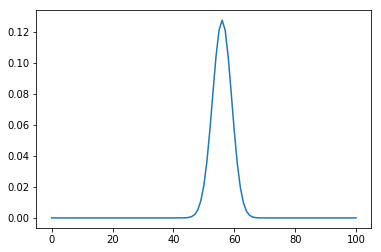

看到證據後，最大的正面機率為： 56 %, 等於 140/250= 0.56
平均值 55.952380952380956
中位數 56
90% 的信賴區間 (51, 61)


In [11]:
from thinkbayes import Suite, Percentile, CredibleInterval
import matplotlib.pyplot as plt

class Euro(Suite):
    
    def Likelihood(self, data, hypo):
        if data == 'H':
            return hypo/100.0
        
        return 1-hypo/100.0

    
head, tail = 140, 110 # 依據問題出現 140 次正面、110次反面
suite = Euro(range(0, 101))
dataset = 'H' * head + 'T' * tail # 觀察到的資料，不考慮順序

for data in dataset:
    suite.Update(data)

x, y = zip(*sorted(suite.Items()))
plt.plot(x, y)
plt.show()
print("看到證據後，最大的正面機率為：", suite.MaximumLikelihood(), "%, 等於 140/250=", head/(head+tail))
print("平均值", suite.Mean())
print("中位數", Percentile(suite, 50))
print("90% 的信賴區間", CredibleInterval(suite, 90))

回到原始的問題，我們想知道硬幣是否公平。我們觀察後驗分佈的90%信賴區間得知 不包含 50% 的正面機率。這表示硬幣不公平。

但這也不精確是一開始的問題。 MacKay 說：「這些證據支持說硬幣是比較不公平的嗎？」

要回答此問題，我要必須要更精準的回答數據構成假設的證據有什麼意義。這也是下一章節要講的主題。

在繼續之前，我想解決一個可能混淆的情況。因為我們想知道硬幣是否公平，所以可能會問出現 x=50% 的機率是多少。

In [6]:
print("出現 x=50% 的機率是：", suite.Prob(50))

出現 x=50% 的機率是 0.02097652612954468


答案約是 0.021，但數值是沒有意義的。

因為決定評估101個假設的決定是任意的（也可以在0~100間切出1000個假設）；我們可以將範圍劃分為更多或更少的部分，如果有的話，任何給定假設的概率都會更大或更小。

下方程式碼便用 0~1000 總共 1001 個假設

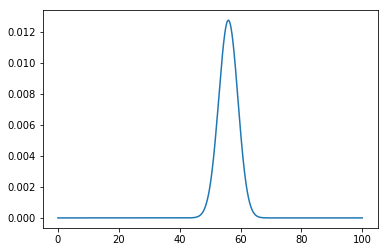

看到證據後，最大的正面機率為： 55.95595595595596 %, 等於 140/250= 0.56
平均值 55.95238095238095
中位數 55.95595595595596
90% 的信賴區間 (50.750750750750754, 61.06106106106107)
出現 x=50% 的機率是： 0
列印假設 50 附近的數值： [49.54954955 49.64964965 49.74974975 49.84984985 49.94994995 50.05005005
 50.15015015 50.25025025 50.35035035 50.45045045]


In [40]:
import numpy as np

suite = Euro(np.linspace(0, 100, 1000)) # 0~100間切出1000個假設
dataset = 'H' * head + 'T' * tail # 觀察到的資料，不考慮順序

for data in dataset:
    suite.Update(data)

x, y = zip(*sorted(suite.Items()))
plt.plot(x, y)
plt.show()
print("看到證據後，最大的正面機率為：", suite.MaximumLikelihood(), "%, 等於 140/250=", head/(head+tail))
print("平均值", suite.Mean())
print("中位數", Percentile(suite, 50))
print("90% 的信賴區間", CredibleInterval(suite, 90))
print("出現 x=50% 的機率是：", suite.Prob(50)) # 因為沒有剛好為 50 的假設

hypos, probs = zip(*suite.Items())

hypos = np.array(hypos)
hypos.sort()
print("列印假設 50 附近的數值：", hypos[np.all([hypos > 49.5, hypos < 50.5], axis=0)])
